<a href="https://colab.research.google.com/github/hlepushe/ML_ITMO/blob/main/%D0%9C%D0%9E_%D0%94%D0%971.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Первая домашняя работа.

Датасет брала по ссылке https://archive.ics.uci.edu/dataset/186/wine+quality

В своей работе хочу использовать часть датасета, а именно характеристики красного вина.
Бизнес задача: создать модель, которая по содержанию алкоголя в вине определяет его кислотность.
ML-задача: линейная регрессия, предсказывание признаков
Для оценки эффективности обучения и точности прогнозов предлагаю использовать метрики R^2 (коэффициент детерминации) и МАЕ (Mean Absolute Error). Данные метрики позволят определить, насколько хорошо модель предсказывает кислотность. а также оценить в абсолютных единицах, как сильно она ошибается.

In [55]:
import numpy as np
import pandas as pd


импортируем файлы датасета


In [33]:
from google.colab import files

uploaded = files.upload()  #загружался файл winequality-red.csv из исходного датасета


Saving winequality-red.csv to winequality-red (1).csv


зададим переменную, посмотрим на содержимое файла


In [34]:
df1 = pd.read_csv('winequality-red.csv')


In [35]:
print("Содержимое файла:")
print(df1.head())


Содержимое файла:
  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                

узнаем количество строк, создадим датасет нужного размера


In [36]:
num_rows, num_columns = df1.shape
print(f"Количество строк в DataFrame1: {num_rows}")

Количество строк в DataFrame1: 1599


In [37]:
red = df1.head(1000)


Оставим только интересующие нас столбцы, а именно "рH" и "alcohol"

P.S: тут происходит страх у ужас, но это мой первый код в жизни и я столкнулась с большим количеством проблем, которые лечились костылями. коротко: в изначальном датасете была только одна колонка, в которой содержалось 12 чисел, разделенных ";". Я разделила датасет на 12 колонок, создала аналогичные изначальным названия для каждой колонки. Вывела интересующие меня колонки в отдельный датасет

In [38]:
print(red.columns)


Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')


In [39]:
red_reset = red
new_column_names = ['fixed acidity/ volatile acidity/ citric acid/ residual sugar/ chlorides/ free sulfur dioxide/ total sulfur dioxide/ density/ pH/ sulphates/ alcohol/ quality' ]
red_reset.columns = new_column_names
print(red_reset.head())
print(red_reset.tail())



  fixed acidity/ volatile acidity/ citric acid/ residual sugar/ chlorides/ free sulfur dioxide/ total sulfur dioxide/ density/ pH/ sulphates/ alcohol/ quality
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                          
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                          
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                          
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                          
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                          
    fixed acidity/ volatile acidity/ citric ac

In [40]:
red_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                        --------------  ----- 
 0   fixed acidity/ volatile acidity/ citric acid/ residual sugar/ chlorides/ free sulfur dioxide/ total sulfur dioxide/ density/ pH/ sulphates/ alcohol/ quality  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [43]:
red1 = pd.DataFrame()
red1[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']] = red_reset['fixed acidity/ volatile acidity/ citric acid/ residual sugar/ chlorides/ free sulfur dioxide/ total sulfur dioxide/ density/ pH/ sulphates/ alcohol/ quality'].str.split(';', expand=True)

red1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         1000 non-null   object
 1   volatile acidity      1000 non-null   object
 2   citric acid           1000 non-null   object
 3   residual sugar        1000 non-null   object
 4   chlorides             1000 non-null   object
 5   free sulfur dioxide   1000 non-null   object
 6   total sulfur dioxide  1000 non-null   object
 7   density               1000 non-null   object
 8   pH                    1000 non-null   object
 9   sulphates             1000 non-null   object
 10  alcohol               1000 non-null   object
 11  quality               1000 non-null   object
dtypes: object(12)
memory usage: 93.9+ KB


In [49]:
red_data = red1[['pH', 'alcohol']]

print(red_data_new.head())
print(red_data_new.tail())



     pH alcohol
0  3.51     9.4
1   3.2     9.8
2  3.26     9.8
3  3.16     9.8
4  3.51     9.4
       pH alcohol
995  3.39    10.1
996  3.71    12.8
997  3.71    12.8
998  3.12     9.1
999  3.47    12.9


Я получила нужный мне датасет, с которым я буду работать. В нем 2 столбца и 1000 строк. Датасет содержит информацию о кислотности вина и процент содержания в нем алкоголя.

Посмотрим на распределения данных и на их основные характеристики


<Axes: >

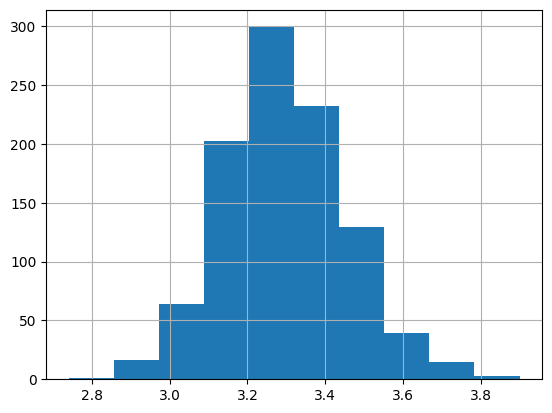

In [46]:
red_new = red_data_new.apply(pd.to_numeric, errors='coerce')

red_new['pH'].hist()


Из гистограммы видно, что большинство образцов имеют кислотность 3,2-3,3. Это надо будет учитывать при разбивке данных на тренировочную и тестовую выборки.

<Axes: >

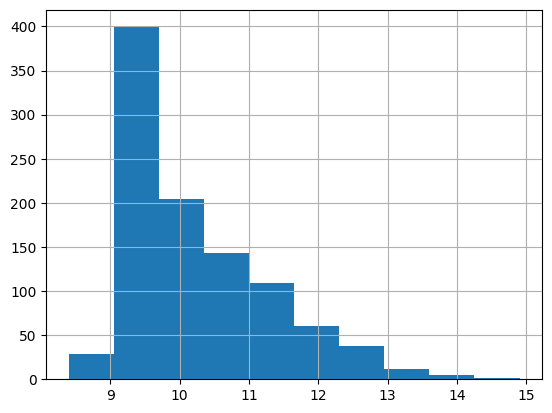

In [47]:
red_new['alcohol'].hist()

Из гистограммы следует, что количество образцов с содержанием алкоголя более 10% значительно меньше. Это может затруднить обучение на данных, которые мало представлены в датасете

In [53]:
print("Статистика для кислотности")
stats = red_new['pH'].describe()
print(stats)

Статистика для кислотности
count    1000.000000
mean        3.299100
std         0.157948
min         2.740000
25%         3.190000
50%         3.300000
75%         3.400000
max         3.900000
Name: pH, dtype: float64


In [54]:
print("Статистика для содержания алкоголя")
stats = red_new['alcohol'].describe()
print(stats)

Статистика для содержания алкоголя
count    1000.000000
mean       10.240700
std         1.033161
min         8.400000
25%         9.500000
50%         9.900000
75%        10.800000
max        14.900000
Name: alcohol, dtype: float64


Можно заметить, что значения кислотности имеют небольшой диапазон значений от 2.7 до 3.9. Значения содержания алкоголя более разнообразные: от 8.4 до 14. Стандартное отклонение для значений кислотности невелико (0.16). Для содержания алкоголя аналогичный параметр равен 1.0, что также немного.

Создадим еще несколько визуализаций данных

In [57]:
import plotly as pl

In [58]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [75]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns


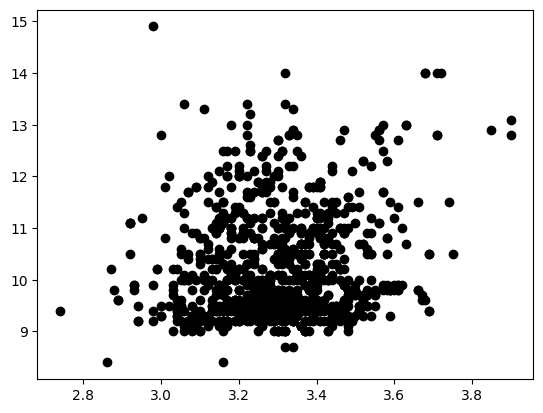

In [81]:
x = pd.DataFrame()
y = pd.DataFrame()

x = red_new[['pH']]
y = red_new[['alcohol']]

plt.scatter(x, y, c = 'black')

Данный график показывает, как распределены данные в зависимости от кислотности и содержания алкоголя. Можно видеть довольно однородное облако с несколькими выбросами в разные стороны.

<Axes: >

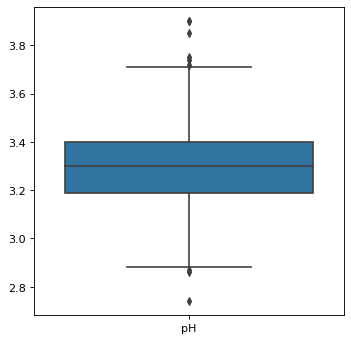

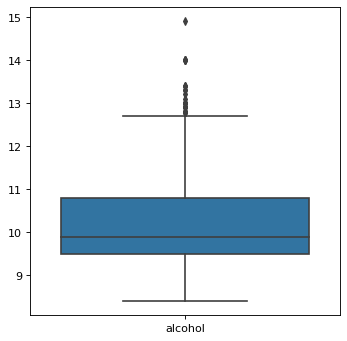

In [80]:
plt.figure(figsize=(5,5), dpi= 80)
sns.boxplot(x, notch=False)

plt.figure(figsize=(5,5), dpi= 80)
sns.boxplot(y, notch=False)

Из боксплотов видно, что в обоих столбцах присутствует небольшое количество выбросов. Это может повлиять на качество обучения модели. Возможно, их стоит исключить из выборки и заменить более однородными с остальной частью данных.